In [ ]:
# thuật toán QAOA
# hướng dẫn cài đặt
# thời gian chạy -> khởi động lại phiên
# uninstall các thư viện
# thời gian chạy -> khởi động lại phiên
# tải các thư viện đúng phiên bản
# thời gian chạy -> khởi động lại phiên
# kiểm tra phiên bản thu viện
# chạy code

In [ ]:
!pip uninstall -y qiskit qiskit-terra qiskit-aer qiskit-algorithms qiskit-optimization


In [ ]:
!pip install qiskit==1.0.2 qiskit-aer==0.14.2 qiskit-algorithms==0.3.0 qiskit-optimization==0.6.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 646.5/646.5 kB 16.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.4/167.4 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 MB 7.2 MB/s eta 0:00:00
  Created wheel for docplex: fi

In [ ]:
import qiskit
import qiskit_aer
import qiskit_algorithms
import qiskit_optimization

print("Qiskit:", qiskit.__version__)
print("Aer:", qiskit_aer.__version__)
print("Algorithms:", qiskit_algorithms.__version__)
print("Optimization:", qiskit_optimization.__version__)


Qiskit: 1.0.2
Aer: 0.14.2
Algorithms: 0.3.0
Optimization: 0.6.0


Nodes: 23 | Edges: 47

✅ QAOA RESULT
Time: 2003.35 seconds
Cut value: -34.0


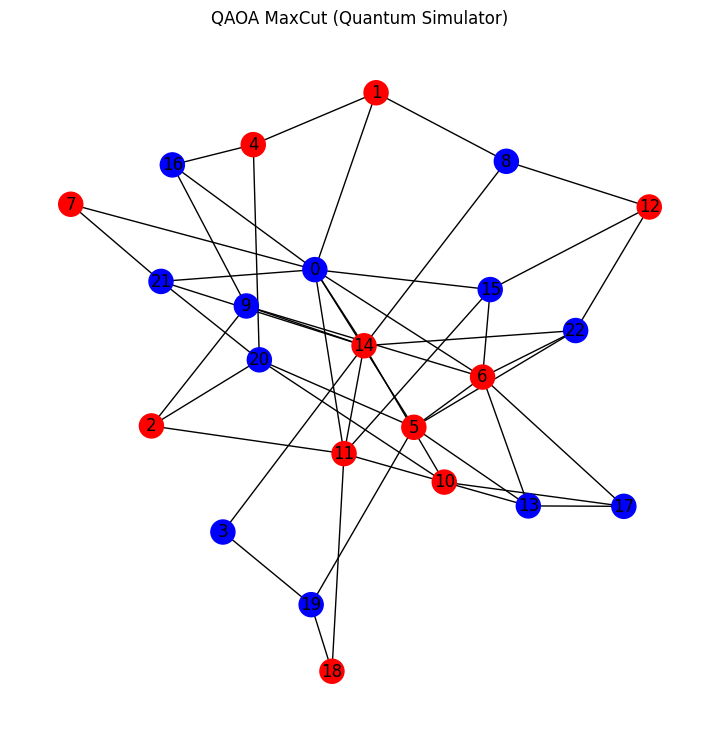

In [ ]:
import numpy as np
import networkx as nx
import time
import matplotlib.pyplot as plt

from qiskit_algorithms.minimum_eigensolvers import QAOA
from qiskit_algorithms.optimizers import SPSA
from qiskit_aer.primitives import Sampler

from qiskit_optimization.applications import Maxcut
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.converters import QuadraticProgramToQubo


# ===== 1️⃣ TẠO ĐỒ THỊ =====
n = 23
p_edge = 0.18
G = nx.erdos_renyi_graph(n, p_edge)
print("Nodes:", G.number_of_nodes(), "| Edges:", G.number_of_edges())


# ===== 2️⃣ QUBO =====
maxcut = Maxcut(G)
qp = maxcut.to_quadratic_program()
qubo = QuadraticProgramToQubo().convert(qp)


# ===== 3️⃣ QAOA =====
sampler = Sampler()
optimizer = SPSA(maxiter=120)

qaoa = QAOA(
    sampler=sampler,
    optimizer=optimizer,
    reps=2
)


# ===== 4️⃣ GIẢI =====
solver = MinimumEigenOptimizer(qaoa)

start = time.time()
result = solver.solve(qubo)
end = time.time()

print("\n✅ QAOA RESULT")
print("Time:", round(end - start, 2), "seconds")
print("Cut value:", result.fval)


# ===== 5️⃣ VẼ =====
solution = result.x
colors = ['red' if solution[i] == 0 else 'blue' for i in range(n)]
pos = nx.spring_layout(G, seed=42)

plt.figure(figsize=(7, 7))
nx.draw(G, pos, node_color=colors, with_labels=True)
plt.title("QAOA MaxCut (Quantum Simulator)")
plt.show()


In [ ]:
# Thuật toán xấp xỉ Goemans–Williamson
# thời gian chạy -> khởi động lại phiên
# tải thư viện
# chạy code

In [ ]:
pip install networkx numpy cvxpy


In [ ]:
import networkx as nx
import numpy as np
import cvxpy as cp
import time

np.random.seed(42)

# Số đỉnh
n = 30
p_edge = 0.2

G = nx.erdos_renyi_graph(n, p_edge)
print("Nodes:", G.number_of_nodes(), "Edges:", G.number_of_edges())


Nodes: 30 Edges: 80


In [ ]:
def goemans_williamson_sdp(graph):
    n = graph.number_of_nodes()
    W = np.zeros((n, n))

    for i, j in graph.edges():
        W[i, j] = 1
        W[j, i] = 1

    # Ma trận SDP
    X = cp.Variable((n, n), PSD=True)

    constraints = [cp.diag(X) == 1]

    objective = cp.Maximize(
        0.25 * cp.sum(cp.multiply(W, (1 - X)))
    )

    problem = cp.Problem(objective, constraints)

    t0 = time.time()
    problem.solve(solver=cp.SCS, verbose=False)
    t1 = time.time()

    print("SDP solved in", round(t1 - t0, 2), "seconds")

    return X.value


In [ ]:
def gw_rounding(X, graph, trials=50):
    n = graph.number_of_nodes()
    best_cut = -1
    best_vec = None

    # Cholesky
    eigvals, eigvecs = np.linalg.eigh(X)
    eigvals[eigvals < 0] = 0
    V = eigvecs @ np.diag(np.sqrt(eigvals))

    for _ in range(trials):
        r = np.random.randn(V.shape[1])
        x = np.sign(V @ r)
        x[x == 0] = 1

        cut = sum(
            1 for i, j in graph.edges()
            if x[i] != x[j]
        )

        if cut > best_cut:
            best_cut = cut
            best_vec = x

    return best_cut, best_vec


In [ ]:
X = goemans_williamson_sdp(G)

cut_gw, sol_gw = gw_rounding(X, G)

print("Goemans–Williamson cut size:", cut_gw, "/", G.number_of_edges())


SDP solved in 0.18 seconds
Goemans–Williamson cut size: 63 / 80


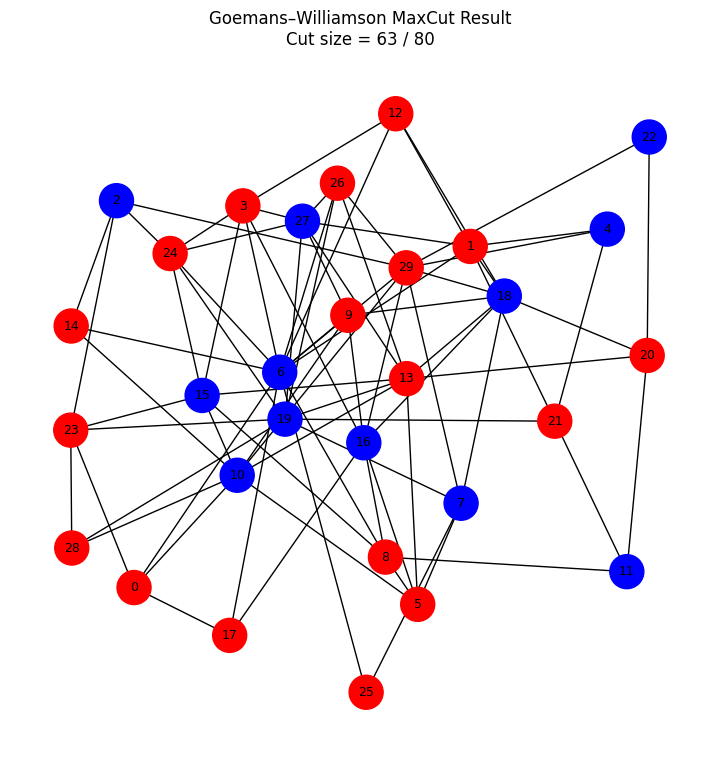

In [ ]:
import matplotlib.pyplot as plt

def plot_maxcut(graph, solution, title="Goemans–Williamson MaxCut"):
    colors = ['blue' if solution[i] > 0 else 'red' for i in range(graph.number_of_nodes())]

    plt.figure(figsize=(7, 7))
    pos = nx.spring_layout(graph, seed=2)
    nx.draw(
        graph,
        pos,
        node_color=colors,
        with_labels=True,
        node_size=600,
        font_size=9
    )

    cut_size = sum(
        1 for i, j in graph.edges()
        if solution[i] != solution[j]
    )

    plt.title(f"{title}\nCut size = {cut_size} / {graph.number_of_edges()}")
    plt.show()
plot_maxcut(G, sol_gw, title="Goemans–Williamson MaxCut Result")
